In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
env_name = 'CustomPendulum-v0'
env_str="pendulum"
figfilenamehead = "fig_policy_evaluation_pendulum_"

num_iter_max=10000
vae_lr=5e-4

seed = 0


In [2]:
env = gym.make(env_name)

random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = 1
print(s_dim, a_dim, z_dim)


c = 0.21455680991172585
2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

c = 0.16346495489906906
c = 0.19376823391999684
c = 0.2675319002346239
c = 0.1150324556477333
c = 0.15866847592587133
c = 0.2776789914877983
c = 0.02613878991046221
c = 0.2497859536643814
c = 0.2610036444740457
c = 0.23974756926501706
c = 0.23415875288593663
c = 0.19197630639825713
c = 0.28340067511487516
c = 0.12439858199715707
c = 0.232270106830265
c = 0.17053018466059455
c = 0.1852906491227631
c = 0.18508019906242706
c = 0.20454608973104502
c = 0.13110958613980242
c = 0.01806764148878095
c = 0.2011913608854478
c = 0.03867788929645599
c = 0.10911323128278679
c = 0.1315804540386961
c = 0.03061344322440842
c = 0.04839285536549887
c = 0.07598748076193464
c = 0.07332767760048083
c = 0.03311254234929154
c = 0.04145488540458414
c = 0.11061755119828923
c = 0.02913038273791838
c = 0.02882952236818892
c = 0.14059536049431046
c = 0.18145365592351378
c = 0.011756337676296202
c = 0.03605896836395067
c = 0.035618315686273216
c = 0.12427889835440098
c = 0.20774163581100594
c = 0.07961684728183362


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(-317.8297)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str
}

vi = vi_base.baseVI(args_init_dict)

In [7]:
vi.get_real_rollout_mdppolicy_data()

0  c = 0.05388110326789044
1  c = 0.2827750799093791
2  c = 0.15731394332316598
3  c = 0.20314234323342722
4  c = 0.15063167421723392
5  c = 0.2724745137703737
6  c = 0.24329451948004602
7  c = 0.03448564489113446
8  c = 0.12566772795552447
9  c = 0.004399746291621242
10  c = 0.031227579640040103
11  c = 0.09497532330898585
12  c = 0.05687215975334853
13  c = 0.23462364322715343
14  c = 0.10108839803214642
15  c = 0.2078441288160539
16  c = 0.04046623426986205
17  c = 0.1695736073349321
18  c = 0.288753688287829
19  c = 0.16412304069194752
20  c = 0.044365065601949014
21  c = 0.23163072784674504
22  c = 0.047219234627092245
23  c = 0.23200469991445097
24  c = 0.21868805929359805
25  c = 0.29750590192818915
26  c = 0.24245242700472103
27  c = 0.2488176727931419
28  c = 0.1037594269002593
29  c = 0.03450842388232006
30  c = 0.2899819933464779
31  c = 0.17124773921915185
32  c = 0.07015124845123409
33  c = 0.0036764408548930925
34  c = 0.07202494056398641
35  c = 0.08517896100238877
36  c

tensor(4.2174)tensor(6.7906)tensor(4.1837)tensor(4.0845)tensor(3.3757)tensor(2.7983)tensor(6.5985)tensor(3.2533)tensor(3.3910)tensor(3.4194)tensor(5.5616)tensor(3.0737)tensor(3.4738)tensor(4.4845)tensor(3.6484)tensor(3.9607)tensor(5.8678)tensor(2.9320)tensor(3.2793)tensor(4.2349)tensor(8.7709)tensor(4.2933)tensor(5.9589)tensor(4.4262)tensor(6.8228)tensor(8.2876)tensor(4.3570)tensor(6.3435)tensor(6.6764)tensor(6.0235)tensor(6.9046)tensor(6.7860)tensor(7.7608)tensor(6.6307)tensor(4.2093)tensor(3.1324)tensor(6.7651)tensor(7.5391)tensor(4.5229)tensor(5.5176)tensor(3.0883)tensor(4.7579)tensor(7.5344)tensor(3.1287)tensor(4.7149)tensor(3.5165)tensor(8.7729)tensor(7.5833)tensor(8.6948)tensor(6.7234)tensor(2.8375)tensor(4.4622)tensor(5.1265)tensor(3.2673)tensor(6.2211)tensor(4.3933)tensor(4.5403)tensor(4.5373)tensor(6.3223)tensor(6.9189)tensor(3.1334)tensor(4.9018)tensor(5.6586)tensor(7.2067)tensor(6.2344)tensor(3.6265)tensor(3.1981)tensor(3.4820)tensor(3.2140)tensor(5.2448)tensor(3.1958)tensor

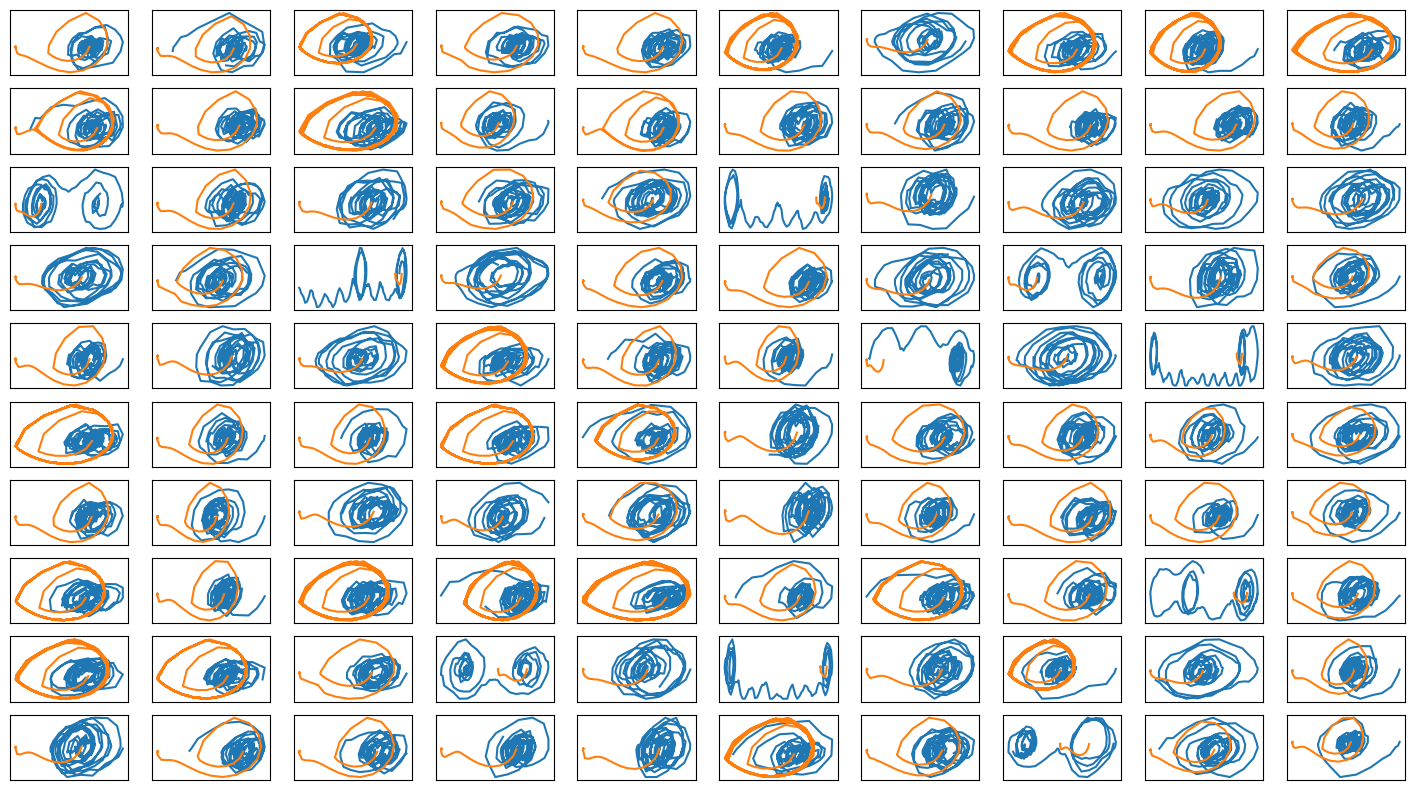

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
# -0.025968981297931983
# tensor([0.5385])


train_vae: enc_dec
train: iter 0  trainloss 895.82577  validloss 521.79106±0.00000  bestvalidloss 521.79106  last_update 0
train: iter 1  trainloss 443.73359  validloss 385.00533±0.00000  bestvalidloss 385.00533  last_update 0
train: iter 2  trainloss 411.65420  validloss 328.62563±0.00000  bestvalidloss 328.62563  last_update 0
train: iter 3  trainloss 390.55758  validloss 334.35339±0.00000  bestvalidloss 328.62563  last_update 1
train: iter 4  trainloss 377.51921  validloss 285.04889±0.00000  bestvalidloss 285.04889  last_update 0
train: iter 5  trainloss 399.83683  validloss 282.79389±0.00000  bestvalidloss 282.79389  last_update 0
train: iter 6  trainloss 380.48155  validloss 362.43432±0.00000  bestvalidloss 282.79389  last_update 1
train: iter 7  trainloss 330.93203  validloss 287.68509±0.00000  bestvalidloss 282.79389  last_update 2
train: iter 8  trainloss 325.89677  validloss 268.24997±0.00000  bestvalidloss 268.24997  last_update 0
train: iter 9  trainloss 320.42381  validloss

train: iter 77  trainloss -454.21012  validloss -604.52942±0.00000  bestvalidloss -609.60998  last_update 2
train: iter 78  trainloss -452.26240  validloss -630.19340±0.00000  bestvalidloss -630.19340  last_update 0
train: iter 79  trainloss -466.68465  validloss -646.46851±0.00000  bestvalidloss -646.46851  last_update 0
train: iter 80  trainloss -472.79687  validloss -634.46062±0.00000  bestvalidloss -646.46851  last_update 1
train: iter 81  trainloss -483.20998  validloss -663.66909±0.00000  bestvalidloss -663.66909  last_update 0
train: iter 82  trainloss -492.89236  validloss -673.91014±0.00000  bestvalidloss -673.91014  last_update 0
train: iter 83  trainloss -504.39270  validloss -667.93230±0.00000  bestvalidloss -673.91014  last_update 1
train: iter 84  trainloss -504.98055  validloss -678.84743±0.00000  bestvalidloss -678.84743  last_update 0
train: iter 85  trainloss -503.83549  validloss -684.68027±0.00000  bestvalidloss -684.68027  last_update 0
train: iter 86  trainloss -5

train: iter 153  trainloss -643.41226  validloss -806.57188±0.00000  bestvalidloss -812.18663  last_update 1
train: iter 154  trainloss -656.16738  validloss -799.54286±0.00000  bestvalidloss -812.18663  last_update 2
train: iter 155  trainloss -650.34228  validloss -805.73367±0.00000  bestvalidloss -812.18663  last_update 3
train: iter 156  trainloss -611.98981  validloss -767.76010±0.00000  bestvalidloss -812.18663  last_update 4
train: iter 157  trainloss -650.46807  validloss -777.80810±0.00000  bestvalidloss -812.18663  last_update 5
train: iter 158  trainloss -645.37230  validloss -800.85347±0.00000  bestvalidloss -812.18663  last_update 6
train: iter 159  trainloss -620.74486  validloss -819.13257±0.00000  bestvalidloss -819.13257  last_update 0
train: iter 160  trainloss -625.46606  validloss -773.25372±0.00000  bestvalidloss -819.13257  last_update 1
train: iter 161  trainloss -634.08472  validloss -769.44847±0.00000  bestvalidloss -819.13257  last_update 2
train: iter 162  tr

train: iter 231  trainloss -675.19695  validloss -765.78509±0.00000  bestvalidloss -854.92014  last_update 4
train: iter 232  trainloss -690.90544  validloss -845.26126±0.00000  bestvalidloss -854.92014  last_update 5
train: iter 233  trainloss -689.81517  validloss -837.90495±0.00000  bestvalidloss -854.92014  last_update 6
train: iter 234  trainloss -620.98315  validloss -847.59449±0.00000  bestvalidloss -854.92014  last_update 7
train: iter 235  trainloss -599.37070  validloss -792.05260±0.00000  bestvalidloss -854.92014  last_update 8
train: iter 236  trainloss -665.26012  validloss -838.11459±0.00000  bestvalidloss -854.92014  last_update 9
train: iter 237  trainloss -660.50302  validloss -804.90865±0.00000  bestvalidloss -854.92014  last_update 10
train: iter 238  trainloss -664.45864  validloss -799.02982±0.00000  bestvalidloss -854.92014  last_update 11
train: iter 239  trainloss -675.46528  validloss -855.09296±0.00000  bestvalidloss -855.09296  last_update 0
train: iter 240  

train: iter 306  trainloss -699.56170  validloss -868.44734±0.00000  bestvalidloss -879.40351  last_update 25
train: iter 307  trainloss -695.59998  validloss -845.75778±0.00000  bestvalidloss -879.40351  last_update 26
train: iter 308  trainloss -702.76408  validloss -785.02616±0.00000  bestvalidloss -879.40351  last_update 27
train: iter 309  trainloss -706.02183  validloss -875.57755±0.00000  bestvalidloss -879.40351  last_update 28
train: iter 310  trainloss -698.85393  validloss -858.21118±0.00000  bestvalidloss -879.40351  last_update 29
train: iter 311  trainloss -688.40129  validloss -879.73900±0.00000  bestvalidloss -879.73900  last_update 0
train: iter 312  trainloss -694.82010  validloss -867.00914±0.00000  bestvalidloss -879.73900  last_update 1
train: iter 313  trainloss -712.57237  validloss -821.46433±0.00000  bestvalidloss -879.73900  last_update 2
train: iter 314  trainloss -705.55600  validloss -871.39186±0.00000  bestvalidloss -879.73900  last_update 3
train: iter 31

train: iter 381  trainloss -707.49603  validloss -807.37432±0.00000  bestvalidloss -901.67324  last_update 2
train: iter 382  trainloss -716.68158  validloss -837.79005±0.00000  bestvalidloss -901.67324  last_update 3
train: iter 383  trainloss -663.21556  validloss -834.17175±0.00000  bestvalidloss -901.67324  last_update 4
train: iter 384  trainloss -712.97705  validloss -846.57721±0.00000  bestvalidloss -901.67324  last_update 5
train: iter 385  trainloss -700.88424  validloss -867.57715±0.00000  bestvalidloss -901.67324  last_update 6
train: iter 386  trainloss -710.85627  validloss -883.70143±0.00000  bestvalidloss -901.67324  last_update 7
train: iter 387  trainloss -720.62400  validloss -871.25354±0.00000  bestvalidloss -901.67324  last_update 8
train: iter 388  trainloss -719.35345  validloss -885.14163±0.00000  bestvalidloss -901.67324  last_update 9
train: iter 389  trainloss -699.20100  validloss -854.79879±0.00000  bestvalidloss -901.67324  last_update 10
train: iter 390  t

train: iter 456  trainloss -720.86149  validloss -879.03224±0.00000  bestvalidloss -904.90200  last_update 61
train: iter 457  trainloss -702.94329  validloss -864.88546±0.00000  bestvalidloss -904.90200  last_update 62
train: iter 458  trainloss -711.73750  validloss -762.83086±0.00000  bestvalidloss -904.90200  last_update 63
train: iter 459  trainloss -732.91064  validloss -888.06893±0.00000  bestvalidloss -904.90200  last_update 64
train: iter 460  trainloss -729.74729  validloss -833.51306±0.00000  bestvalidloss -904.90200  last_update 65
train: iter 461  trainloss -720.81205  validloss -894.83542±0.00000  bestvalidloss -904.90200  last_update 66
train: iter 462  trainloss -710.84043  validloss -884.24959±0.00000  bestvalidloss -904.90200  last_update 67
train: iter 463  trainloss -695.26530  validloss -707.44302±0.00000  bestvalidloss -904.90200  last_update 68
train: iter 464  trainloss -694.04543  validloss -747.42198±0.00000  bestvalidloss -904.90200  last_update 69
train: ite

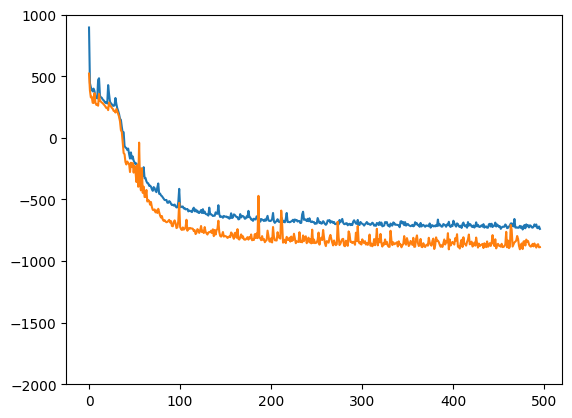

train_vae: enc
train: iter 0  trainloss -697.68437  validloss -908.77237±0.00000  bestvalidloss -908.77237  last_update 0
train: iter 1  trainloss -700.38138  validloss -900.51413±0.00000  bestvalidloss -908.77237  last_update 1
train: iter 2  trainloss -710.43485  validloss -875.69943±0.00000  bestvalidloss -908.77237  last_update 2
train: iter 3  trainloss -693.68122  validloss -905.63476±0.00000  bestvalidloss -908.77237  last_update 3
train: iter 4  trainloss -718.59809  validloss -887.14230±0.00000  bestvalidloss -908.77237  last_update 4
train: iter 5  trainloss -703.23063  validloss -907.47796±0.00000  bestvalidloss -908.77237  last_update 5
train: iter 6  trainloss -715.28279  validloss -895.23456±0.00000  bestvalidloss -908.77237  last_update 6
train: iter 7  trainloss -697.43748  validloss -886.94904±0.00000  bestvalidloss -908.77237  last_update 7
train: iter 8  trainloss -715.03148  validloss -832.21113±0.00000  bestvalidloss -908.77237  last_update 8
train: iter 9  trainlo

train: iter 76  trainloss -720.44513  validloss -906.53097±0.00000  bestvalidloss -910.01140  last_update 4
train: iter 77  trainloss -720.04361  validloss -905.08768±0.00000  bestvalidloss -910.01140  last_update 5
train: iter 78  trainloss -718.99289  validloss -908.28898±0.00000  bestvalidloss -910.01140  last_update 6
train: iter 79  trainloss -706.80865  validloss -905.44080±0.00000  bestvalidloss -910.01140  last_update 7
train: iter 80  trainloss -705.03725  validloss -906.22441±0.00000  bestvalidloss -910.01140  last_update 8
train: iter 81  trainloss -718.06119  validloss -887.64349±0.00000  bestvalidloss -910.01140  last_update 9
train: iter 82  trainloss -708.96412  validloss -907.18809±0.00000  bestvalidloss -910.01140  last_update 10
train: iter 83  trainloss -718.80917  validloss -903.63720±0.00000  bestvalidloss -910.01140  last_update 11
train: iter 84  trainloss -711.12984  validloss -853.99027±0.00000  bestvalidloss -910.01140  last_update 12
train: iter 85  trainloss

train: iter 151  trainloss -717.08987  validloss -890.23893±0.00000  bestvalidloss -910.01140  last_update 79
train: iter 152  trainloss -718.64977  validloss -873.94401±0.00000  bestvalidloss -910.01140  last_update 80
train: iter 153  trainloss -713.11783  validloss -906.03182±0.00000  bestvalidloss -910.01140  last_update 81
train: iter 154  trainloss -706.71094  validloss -861.64187±0.00000  bestvalidloss -910.01140  last_update 82
train: iter 155  trainloss -717.93020  validloss -892.98329±0.00000  bestvalidloss -910.01140  last_update 83
train: iter 156  trainloss -714.81327  validloss -909.03551±0.00000  bestvalidloss -910.01140  last_update 84
train: iter 157  trainloss -674.74046  validloss -907.85884±0.00000  bestvalidloss -910.01140  last_update 85
train: iter 158  trainloss -713.38812  validloss -905.68942±0.00000  bestvalidloss -910.01140  last_update 86
train: iter 159  trainloss -718.04351  validloss -902.24929±0.00000  bestvalidloss -910.01140  last_update 87
train: ite

train: iter 53  trainloss -732.76064  validloss -876.63311±0.00000  bestvalidloss -914.25238  last_update 5
train: iter 54  trainloss -735.85816  validloss -880.80439±0.00000  bestvalidloss -914.25238  last_update 6
train: iter 55  trainloss -731.54199  validloss -881.89854±0.00000  bestvalidloss -914.25238  last_update 7
train: iter 56  trainloss -735.69795  validloss -857.48545±0.00000  bestvalidloss -914.25238  last_update 8
train: iter 57  trainloss -741.45274  validloss -897.28145±0.00000  bestvalidloss -914.25238  last_update 9
train: iter 58  trainloss -733.02984  validloss -866.69881±0.00000  bestvalidloss -914.25238  last_update 10
train: iter 59  trainloss -719.13664  validloss -899.12748±0.00000  bestvalidloss -914.25238  last_update 11
train: iter 60  trainloss -726.26704  validloss -885.71523±0.00000  bestvalidloss -914.25238  last_update 12
train: iter 61  trainloss -735.76148  validloss -876.72790±0.00000  bestvalidloss -914.25238  last_update 13
train: iter 62  trainlos

train: iter 129  trainloss -738.39460  validloss -885.76340±0.00000  bestvalidloss -914.41669  last_update 42
train: iter 130  trainloss -741.70692  validloss -909.40238±0.00000  bestvalidloss -914.41669  last_update 43
train: iter 131  trainloss -736.77894  validloss -862.39662±0.00000  bestvalidloss -914.41669  last_update 44
train: iter 132  trainloss -729.21403  validloss -901.65307±0.00000  bestvalidloss -914.41669  last_update 45
train: iter 133  trainloss -738.60266  validloss -891.45825±0.00000  bestvalidloss -914.41669  last_update 46
train: iter 134  trainloss -750.20043  validloss -898.53362±0.00000  bestvalidloss -914.41669  last_update 47
train: iter 135  trainloss -747.20697  validloss -904.70919±0.00000  bestvalidloss -914.41669  last_update 48
train: iter 136  trainloss -752.03220  validloss -880.58580±0.00000  bestvalidloss -914.41669  last_update 49
train: iter 137  trainloss -744.60598  validloss -914.80796±0.00000  bestvalidloss -914.80796  last_update 0
train: iter

train: iter 204  trainloss -748.31843  validloss -891.05356±0.00000  bestvalidloss -926.41228  last_update 40
train: iter 205  trainloss -755.65151  validloss -819.44236±0.00000  bestvalidloss -926.41228  last_update 41
train: iter 206  trainloss -731.93239  validloss -909.11222±0.00000  bestvalidloss -926.41228  last_update 42
train: iter 207  trainloss -737.94771  validloss -895.30951±0.00000  bestvalidloss -926.41228  last_update 43
train: iter 208  trainloss -748.86575  validloss -895.94784±0.00000  bestvalidloss -926.41228  last_update 44
train: iter 209  trainloss -739.30725  validloss -859.48430±0.00000  bestvalidloss -926.41228  last_update 45
train: iter 210  trainloss -753.74827  validloss -892.39864±0.00000  bestvalidloss -926.41228  last_update 46
train: iter 211  trainloss -750.65776  validloss -915.26458±0.00000  bestvalidloss -926.41228  last_update 47
train: iter 212  trainloss -760.19687  validloss -896.99903±0.00000  bestvalidloss -926.41228  last_update 48
train: ite

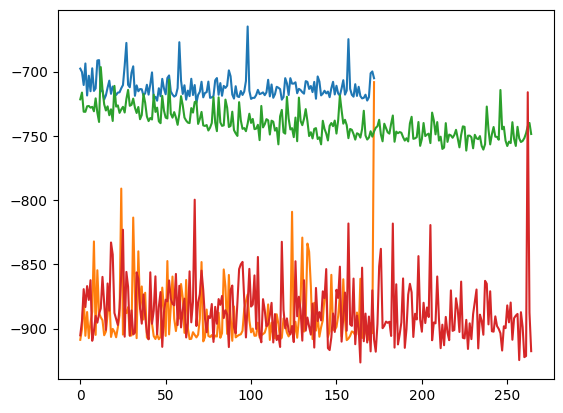

In [10]:
train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=1)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.ylim([-2000, 1000])
plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=2)
vi.update_mulogvar_offlinedata()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
#
#plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=3)
vi.update_mulogvar_offlinedata()
plt.plot(train_curve)
plt.plot(valid_curve)

# y_min = max(-2000, min(max(train_curve),max(valid_curve)))
# y_max = min(1000, max(min(train_curve),min(valid_curve)))
# plt.ylim([y_min, y_max])
plt.show()

# vi.save()


In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

0  c = 0.13159519636310088
1  c = 0.12951067622748852
2  c = 0.005197589192943075
3  c = 0.0902764219426233
4  c = 0.07621501142010059
5  c = 0.18715076160342078
6  c = 0.2554051812995451
7  c = 0.2052617851631404
8  c = 0.2013741802138465
9  c = 0.29097036262106946
10  c = 0.12155397163441888
11  c = 0.02225631440137772
12  c = 0.23841777162901953
13  c = 0.27179701676663837
14  c = 0.2153779879090211
15  c = 0.05121274577130534
16  c = 0.028351835136971457
17  c = 0.13604964722901305
18  c = 0.27802326546684525
19  c = 0.09160548155301017
20  c = 0.28090078318561107
21  c = 0.05968268482602988
22  c = 0.0943897869336361
23  c = 0.11749580596434184
24  c = 0.19475485051206143
25  c = 0.13527468561341402
26  c = 0.15864505297039203
27  c = 0.21749513855114624
28  c = 0.07376341627457253
29  c = 0.19641236030211587
30  c = 0.055810645910584766
31  c = 0.2146311790072574
32  c = 0.21417654295102959
33  c = 0.12726478131647642
34  c = 0.1371063202254494
35  c = 0.23812653409896495
36  c =

97  c = 0.07490740178067422
98  c = 0.2018997569455212
99  c = 0.14724458579007638
 
実環境方策rollout vs Sim環境方策rollout


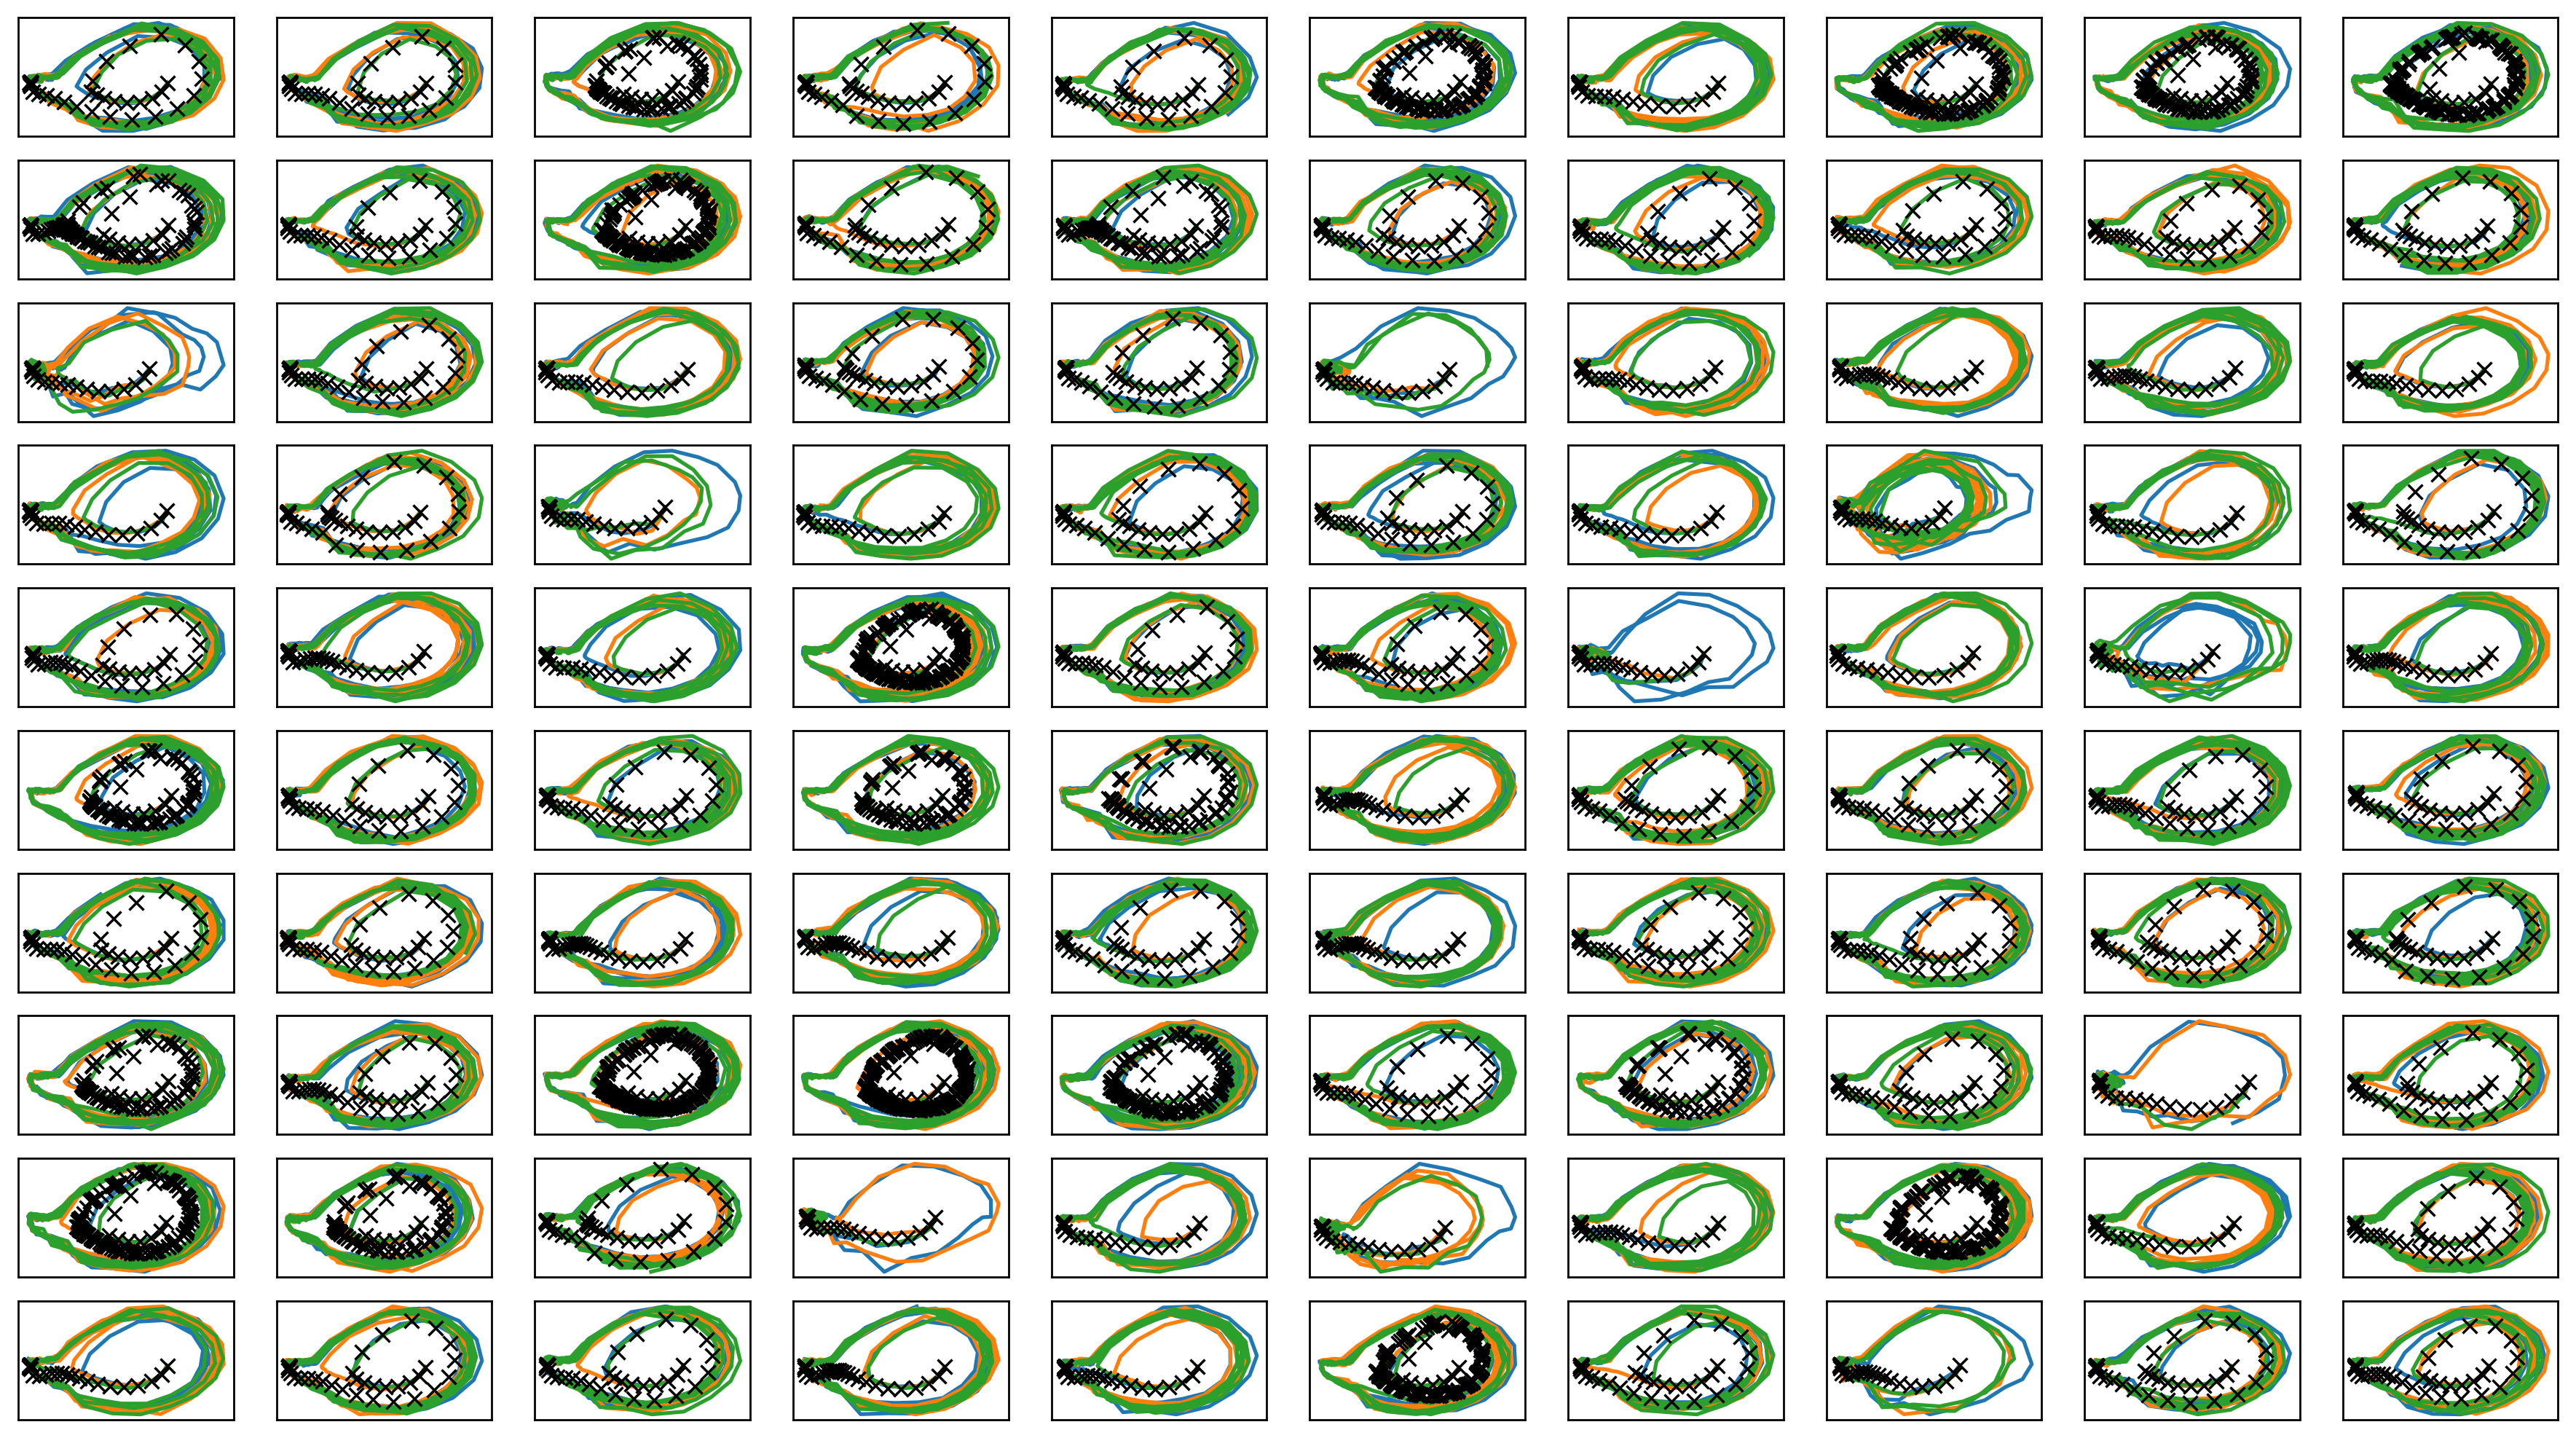

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen(update_belief=False)
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

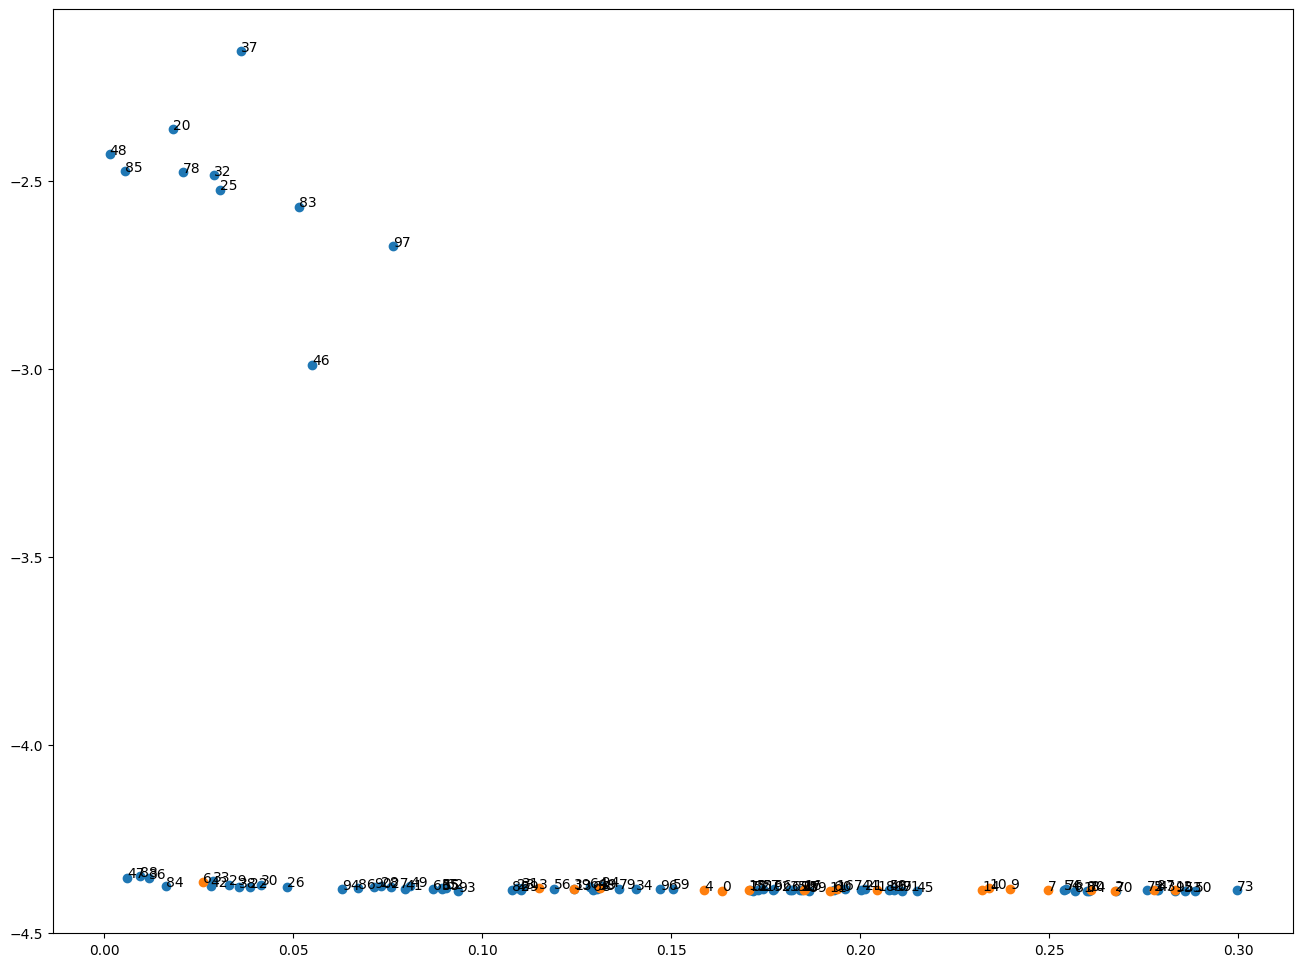

[0.16346495 0.19376823 0.2675319  0.11503246 0.15866848 0.27767899
 0.02613879 0.24978595 0.26100364 0.23974757 0.23415875 0.19197631
 0.28340068 0.12439858 0.23227011 0.17053018 0.18529065 0.1850802
 0.20454609 0.13110959 0.01806764 0.20119136 0.03867789 0.10911323
 0.13158045 0.03061344 0.04839286 0.07598748 0.07332768 0.03311254
 0.04145489 0.11061755 0.02913038 0.02882952 0.14059536 0.18145366
 0.01175634 0.03605897 0.03561832 0.1242789  0.20774164 0.07961685
 0.02818215 0.27878886 0.20022311 0.21489816 0.05495741 0.00603226
 0.00140864 0.08100239 0.28865656 0.1728472  0.17167557 0.2858247
 0.2539226  0.08923109 0.11895172 0.17438186 0.20775948 0.15039731
 0.19319706 0.18191796 0.09047245 0.08702328 0.12863061 0.0894847
 0.17726183 0.19596025 0.12942553 0.11026856 0.26757701 0.21116658
 0.27584478 0.2996541  0.26043782 0.18466787 0.25440247 0.17073022
 0.0207501  0.1360628  0.2599147  0.256741   0.10799342 0.0514889
 0.0163014  0.00555654 0.06717741 0.27842439 0.00955168 0.18644352

In [13]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


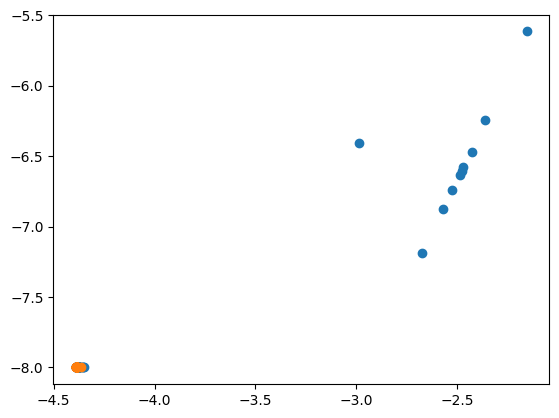

In [14]:
# plt.plot(np_mulogvar[vi.validdata_num:,0],np.exp(0.5*np_mulogvar[vi.validdata_num:,1]), "o")
# plt.plot(np_mulogvar[:vi.validdata_num,0],np.exp(0.5*np_mulogvar[:vi.validdata_num,1]),  "o")
# print("平均-標準偏差")
plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [15]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=100)


train: iter 0  trainloss 9.26157  validloss 10.56472±0.00000  bestvalidloss 10.56472  last_update 0
train: iter 1  trainloss 8.43993  validloss 9.57672±0.00000  bestvalidloss 9.57672  last_update 0
train: iter 2  trainloss 7.73808  validloss 8.71193±0.00000  bestvalidloss 8.71193  last_update 0
train: iter 3  trainloss 7.10116  validloss 8.01207±0.00000  bestvalidloss 8.01207  last_update 0
train: iter 4  trainloss 6.56891  validloss 7.38121±0.00000  bestvalidloss 7.38121  last_update 0
train: iter 5  trainloss 6.12130  validloss 6.86673±0.00000  bestvalidloss 6.86673  last_update 0
train: iter 6  trainloss 5.73107  validloss 6.39828±0.00000  bestvalidloss 6.39828  last_update 0
train: iter 7  trainloss 5.37121  validloss 5.99587±0.00000  bestvalidloss 5.99587  last_update 0
train: iter 8  trainloss 5.06762  validloss 5.61741±0.00000  bestvalidloss 5.61741  last_update 0
train: iter 9  trainloss 4.78280  validloss 5.30919±0.00000  bestvalidloss 5.30919  last_update 0
train: iter 10  tr

train: iter 88  trainloss 1.06141  validloss 0.89529±0.00000  bestvalidloss 0.89529  last_update 0
train: iter 89  trainloss 1.05333  validloss 0.86793±0.00000  bestvalidloss 0.86793  last_update 0
train: iter 90  trainloss 1.03533  validloss 0.84876±0.00000  bestvalidloss 0.84876  last_update 0
train: iter 91  trainloss 1.03328  validloss 0.82037±0.00000  bestvalidloss 0.82037  last_update 0
train: iter 92  trainloss 1.01818  validloss 0.80366±0.00000  bestvalidloss 0.80366  last_update 0
train: iter 93  trainloss 1.00961  validloss 0.78353±0.00000  bestvalidloss 0.78353  last_update 0
train: iter 94  trainloss 1.00550  validloss 0.76497±0.00000  bestvalidloss 0.76497  last_update 0
train: iter 95  trainloss 0.99460  validloss 0.74949±0.00000  bestvalidloss 0.74949  last_update 0
train: iter 96  trainloss 1.00331  validloss 0.73874±0.00000  bestvalidloss 0.73874  last_update 0
train: iter 97  trainloss 0.98972  validloss 0.72856±0.00000  bestvalidloss 0.72856  last_update 0
train: ite

train: iter 171  trainloss 0.94648  validloss 0.52727±0.00000  bestvalidloss 0.52621  last_update 10
train: iter 172  trainloss 0.93922  validloss 0.52757±0.00000  bestvalidloss 0.52621  last_update 11
train: iter 173  trainloss 0.93629  validloss 0.52882±0.00000  bestvalidloss 0.52621  last_update 12
train: iter 174  trainloss 0.95459  validloss 0.53130±0.00000  bestvalidloss 0.52621  last_update 13
train: iter 175  trainloss 0.95156  validloss 0.52167±0.00000  bestvalidloss 0.52167  last_update 0
train: iter 176  trainloss 0.93833  validloss 0.53133±0.00000  bestvalidloss 0.52167  last_update 1
train: iter 177  trainloss 0.94710  validloss 0.52772±0.00000  bestvalidloss 0.52167  last_update 2
train: iter 178  trainloss 0.95654  validloss 0.52482±0.00000  bestvalidloss 0.52167  last_update 3
train: iter 179  trainloss 0.96156  validloss 0.52649±0.00000  bestvalidloss 0.52167  last_update 4
train: iter 180  trainloss 0.94113  validloss 0.52652±0.00000  bestvalidloss 0.52167  last_updat

train: iter 255  trainloss 0.95230  validloss 0.51955±0.00000  bestvalidloss 0.51243  last_update 25
train: iter 256  trainloss 0.95248  validloss 0.52296±0.00000  bestvalidloss 0.51243  last_update 26
train: iter 257  trainloss 0.93749  validloss 0.51975±0.00000  bestvalidloss 0.51243  last_update 27
train: iter 258  trainloss 0.94152  validloss 0.51472±0.00000  bestvalidloss 0.51243  last_update 28
train: iter 259  trainloss 0.93212  validloss 0.51788±0.00000  bestvalidloss 0.51243  last_update 29
train: iter 260  trainloss 0.93704  validloss 0.52136±0.00000  bestvalidloss 0.51243  last_update 30
train: iter 261  trainloss 0.94296  validloss 0.51863±0.00000  bestvalidloss 0.51243  last_update 31
train: iter 262  trainloss 0.93765  validloss 0.51837±0.00000  bestvalidloss 0.51243  last_update 32
train: iter 263  trainloss 0.95042  validloss 0.51712±0.00000  bestvalidloss 0.51243  last_update 33
train: iter 264  trainloss 0.94102  validloss 0.51508±0.00000  bestvalidloss 0.51243  last_

train: iter 344  trainloss 0.93996  validloss 0.52306±0.00000  bestvalidloss 0.50953  last_update 62
train: iter 345  trainloss 0.94949  validloss 0.51330±0.00000  bestvalidloss 0.50953  last_update 63
train: iter 346  trainloss 0.94044  validloss 0.51478±0.00000  bestvalidloss 0.50953  last_update 64
train: iter 347  trainloss 0.93315  validloss 0.52027±0.00000  bestvalidloss 0.50953  last_update 65
train: iter 348  trainloss 0.93775  validloss 0.51533±0.00000  bestvalidloss 0.50953  last_update 66
train: iter 349  trainloss 0.94572  validloss 0.51747±0.00000  bestvalidloss 0.50953  last_update 67
train: iter 350  trainloss 0.95264  validloss 0.51784±0.00000  bestvalidloss 0.50953  last_update 68
train: iter 351  trainloss 0.93514  validloss 0.50769±0.00000  bestvalidloss 0.50769  last_update 0
train: iter 352  trainloss 0.94610  validloss 0.51545±0.00000  bestvalidloss 0.50769  last_update 1
train: iter 353  trainloss 0.93704  validloss 0.51526±0.00000  bestvalidloss 0.50769  last_up

train: iter 427  trainloss 0.92628  validloss 0.51952±0.00000  bestvalidloss 0.50769  last_update 76
train: iter 428  trainloss 0.94639  validloss 0.51868±0.00000  bestvalidloss 0.50769  last_update 77
train: iter 429  trainloss 0.93981  validloss 0.52179±0.00000  bestvalidloss 0.50769  last_update 78
train: iter 430  trainloss 0.94901  validloss 0.51608±0.00000  bestvalidloss 0.50769  last_update 79
train: iter 431  trainloss 0.93902  validloss 0.52163±0.00000  bestvalidloss 0.50769  last_update 80
train: iter 432  trainloss 0.95092  validloss 0.52021±0.00000  bestvalidloss 0.50769  last_update 81
train: iter 433  trainloss 0.93541  validloss 0.51665±0.00000  bestvalidloss 0.50769  last_update 82
train: iter 434  trainloss 0.95166  validloss 0.52145±0.00000  bestvalidloss 0.50769  last_update 83
train: iter 435  trainloss 0.94534  validloss 0.51777±0.00000  bestvalidloss 0.50769  last_update 84
train: iter 436  trainloss 0.95199  validloss 0.51810±0.00000  bestvalidloss 0.50769  last_

In [16]:
print(vi.initial_belief)


Parameter containing:
tensor([-4.1480, -0.9473], requires_grad=True)


In [17]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100)

train: iter 0  trainloss 14.13814  validloss 23.23732±0.00000  bestvalidloss 23.23732  last_update 0
train: iter 1  trainloss 7.34281  validloss 12.70612±0.00000  bestvalidloss 12.70612  last_update 0
train: iter 2  trainloss 4.34378  validloss 6.25199±0.00000  bestvalidloss 6.25199  last_update 0
train: iter 3  trainloss 3.39345  validloss 3.68827±0.00000  bestvalidloss 3.68827  last_update 0
train: iter 4  trainloss 3.00931  validloss 2.52357±0.00000  bestvalidloss 2.52357  last_update 0
train: iter 5  trainloss 2.84307  validloss 2.04091±0.00000  bestvalidloss 2.04091  last_update 0
train: iter 6  trainloss 2.68922  validloss 1.68436±0.00000  bestvalidloss 1.68436  last_update 0
train: iter 7  trainloss 2.55588  validloss 1.66533±0.00000  bestvalidloss 1.66533  last_update 0
train: iter 8  trainloss 2.43263  validloss 1.56878±0.00000  bestvalidloss 1.56878  last_update 0
train: iter 9  trainloss 2.26606  validloss 1.48339±0.00000  bestvalidloss 1.48339  last_update 0
train: iter 10 

train: iter 83  trainloss 1.42229  validloss 0.99395±0.00000  bestvalidloss 0.93764  last_update 22
train: iter 84  trainloss 1.41653  validloss 1.00765±0.00000  bestvalidloss 0.93764  last_update 23
train: iter 85  trainloss 1.40830  validloss 1.01897±0.00000  bestvalidloss 0.93764  last_update 24
train: iter 86  trainloss 1.48471  validloss 0.94007±0.00000  bestvalidloss 0.93764  last_update 25
train: iter 87  trainloss 1.44306  validloss 0.97010±0.00000  bestvalidloss 0.93764  last_update 26
train: iter 88  trainloss 1.43178  validloss 1.04784±0.00000  bestvalidloss 0.93764  last_update 27
train: iter 89  trainloss 1.45655  validloss 0.97186±0.00000  bestvalidloss 0.93764  last_update 28
train: iter 90  trainloss 1.42394  validloss 1.02979±0.00000  bestvalidloss 0.93764  last_update 29
train: iter 91  trainloss 1.41896  validloss 1.02345±0.00000  bestvalidloss 0.93764  last_update 30
train: iter 92  trainloss 1.42402  validloss 1.10800±0.00000  bestvalidloss 0.93764  last_update 31


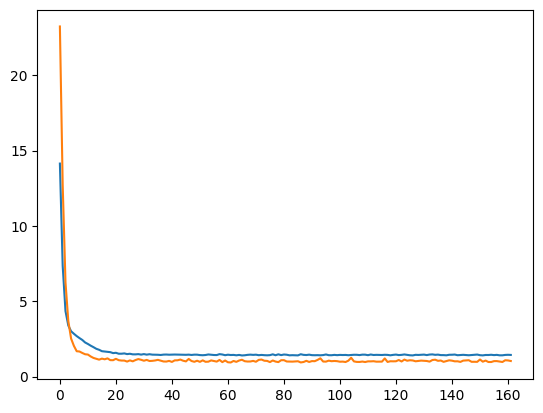

In [18]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [19]:
vi.save()

base save ckpt ckpt_basevi_pendulum_unweighted


In [20]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.16521043602627408
tensor([0.5385])


In [21]:
# 0.16521043602627408
# tensor([0.5385])

In [22]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

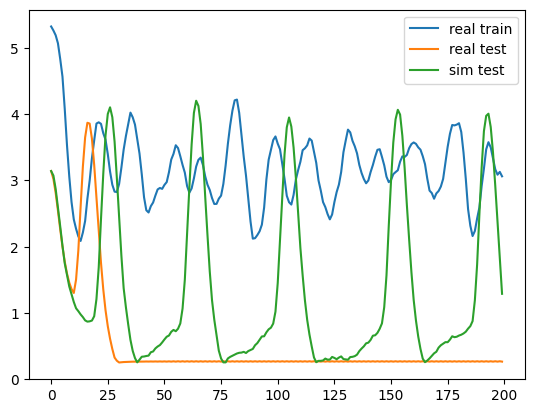

encoder [-4.381696 -8.      ]
initial_belief tensor([-4.1480, -0.9473])
real train tensor([-4.3924, -8.0148])
real test tensor([-2.3652, -6.2538])
sim tensor([-4.3757, -8.0000])


In [23]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-4.346938775510204


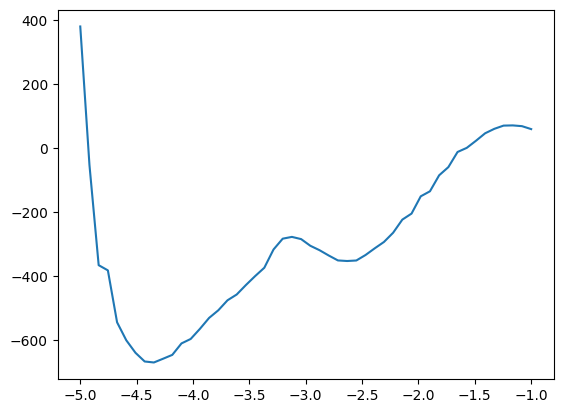

In [24]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [25]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.46741905119734256
tensor([-1.2660])


In [26]:
# -0.46741905119734256
# tensor([-1.2660])